In [2]:
import keras
from keras.layers import Conv2D
from keras.layers import ConvLSTM2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Reshape
from keras.layers import Softmax
from keras.layers import MaxPooling2D
from keras.models import Sequential

from keras.datasets import mnist
import matplotlib.pyplot as plt

import numpy as np

Using TensorFlow backend.


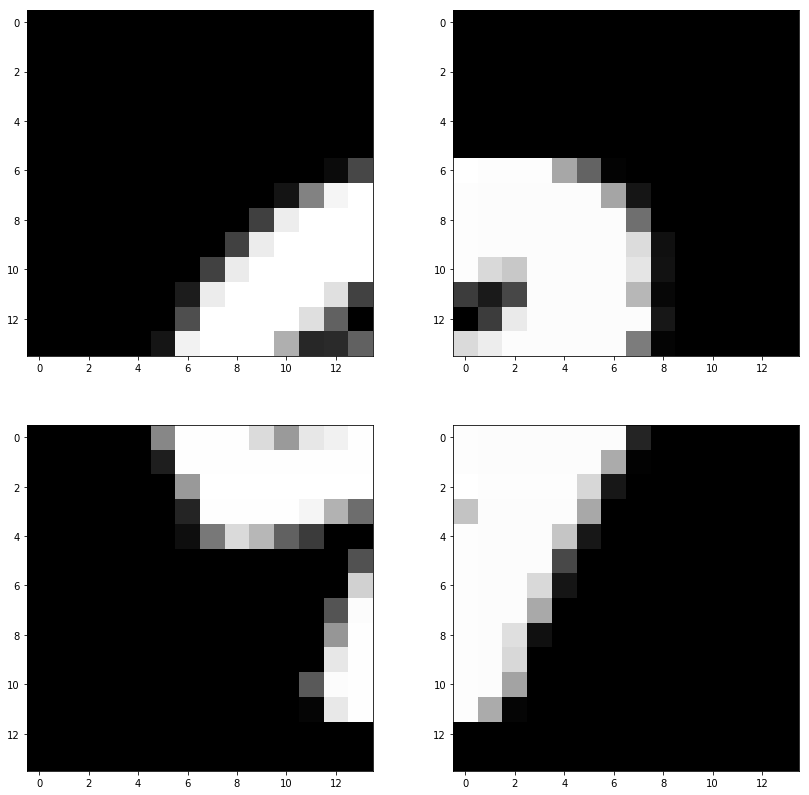

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train = x_train.reshape(-1, 28, 28, 1)
# x_test = x_test.reshape(-1, 28, 28, 1)
y = [[1 if i == j else 0 for i in range(10)] for j in y_train]
y_train = np.asarray(y)
y = [[1 if i == j else 0 for i in range(10)] for j in y_test]
y_test = np.asarray(y)

#turns into sequences
x = [x_train, x_test]
for index in range(len(x)):
    train_seq = np.zeros((len(x[index]), 4, 14, 14))
    for i in range(len(x[index])):
        train_seq[i][0] = x[index][i][0:14, 0:14]
        train_seq[i][1] = x[index][i][0:14, 14:28]
        train_seq[i][2] = x[index][i][14:28, 0:14]
        train_seq[i][3] = x[index][i][14:28, 14:28]
    train_seq = train_seq.reshape(-1, 4, 14, 14, 1)
    x[index] = train_seq
x_train = x[0]
x_test = x[1]


#displays how a random digit is split up into 4
fig = plt.figure(figsize=(14,14))
sample = np.random.randint(len(x_train))
fig.add_subplot(2,2, 1)
plt.imshow(x_train[sample, 0].reshape(14,14) , cmap='gray')
fig.add_subplot(2,2, 2)
plt.imshow(x_train[sample, 1].reshape(14,14) , cmap='gray')
fig.add_subplot(2,2, 3)
plt.imshow(x_train[sample, 2].reshape(14,14) , cmap='gray')
fig.add_subplot(2,2, 4)
plt.imshow(x_train[sample, 3].reshape(14,14) , cmap='gray')
plt.show()

In [4]:
'''
Equivalent non-reccurent model would have 78,560 parameters to learn.
40 2x2 convolutions plus a 1960x10 dense layer yields 78,560 parameters.

This LSTM learns only 46,170 parameters
'''
model = Sequential()

model.add(ConvLSTM2D(40, kernel_size=(2,2), padding="same", input_shape=(4,14,14,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(rate=.2))

model.add(Reshape((1960,)))
model.add(Dense(10))
model.add(Activation("softmax"))

In [5]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
model.fit(x_train, y_train, shuffle=True, batch_size=16, epochs=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 328s 5ms/step - loss: 0.2326 - acc: 0.9282 - val_loss: 0.1265 - val_acc: 0.9614


predicted: 7 real: 2
[[8.7581488e-05 1.2267997e-06 1.6553329e-01 5.0162309e-04 6.0647729e-08
  1.1773963e-06 9.3602439e-06 6.5994269e-01 1.7391363e-01 9.3573790e-06]]


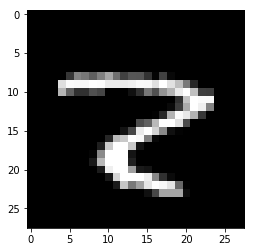

In [12]:
#visualize misclassifications

misclassified = np.zeros((28,28))
correct = True
while correct:
    i = np.random.randint(len(x_test))
    y_hat = model.predict(x_test[i].reshape(-1, 4, 14, 14, 1))
    y_hat = np.argmax(y_hat)
    y_ground = np.argmax(y_test[i])
    if y_hat != y_ground:
        correct = False
        example = x_test[i].reshape(4, 14, 14)
        misclassified[0:14, 0:14] = example[0]
        misclassified[0:14, 14:28] = example[1]
        misclassified[14:28, 0:14] = example[2]
        misclassified[14:28, 14:28] = example[3]
        print("predicted:", y_hat, "real:", y_ground)
        print(model.predict(x_test[i].reshape(-1, 4, 14, 14, 1)))

plt.imshow(misclassified, cmap='gray')
plt.show()
